In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from code.preprocessing import get_dataset
from code.pca import customPCA
from code.optics import apply_optics
#from code.global_kmeans import run_global_kmeans
from code.metrics import get_metrics_general
from code.global_fastkmeans import run_global_kmeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

PCA_CLUSTER

In [16]:
def pca_cluster(data, Y, method='G-Means', max_clusters_gkmeans=12, optics_metric='euclidean', optics_algorithm='auto'):
    results = []
    # Apply PCA
    pca = customPCA()
    reduced_data = pca.reduce_dim(data, n_components=None)

    # Calculate explained variance
    explained_variance_ratio = pca.explained_variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, len(cumulative_explained_variance) + 1),
             cumulative_explained_variance * 100,
             marker='o', linestyle='-')
    plt.title('Cumulative Explained Variance by Principal Component')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.grid(True)
    plt.show()

    for component in np.arange(1, len(cumulative_explained_variance) + 1):

        reduced_data = pca.reduce_dim(data, n_components=component)


        if method == 'G-Means':
            start_time = time.time()
            #clusters_gkmeans, labels_gkmeans = run_global_kmeans(reduced_data, max_clusters=max_clusters_gkmeans, distance= 'euclidean')
            clusters_gkmeans, labels_gkmeans = run_global_kmeans(reduced_data, max_clusters=max_clusters_gkmeans, distance= 'euclidean')
            end_time = time.time()
            g_time = end_time - start_time
            reconstructed_data = pca.reconstruct(reduced_data)

            # Calculate reconstruction error
            reconstruction_error = pca.reconstruction_error(data)

            results_means = get_metrics_general(reduced_data, Y, labels_gkmeans, method, g_time, n_iterations=None)
            results_means['n_components'] = component
            results_means['explained_variance'] = cumulative_explained_variance[component - 1]
            results_means['reconstruction_error'] = reconstruction_error
            results.append(results_means)
            print(component)


        elif method == 'Optics':
            start_time = time.time()
            optics_labels = apply_optics(reduced_data, metric=optics_metric, algorithm=optics_algorithm)
            end_time = time.time()
            o_time = end_time - start_time
            reconstructed_data = pca.reconstruct(reduced_data)

            # Calculate reconstruction error
            reconstruction_error = pca.reconstruction_error(data)

            results_optics = get_metrics_general(reduced_data, Y, optics_labels, method, o_time, n_iterations=None)
            results_optics['n_components'] = component
            results_optics['explained_variance'] = cumulative_explained_variance[component - 1]
            results_optics['reconstruction_error'] = reconstruction_error
            results.append(results_optics)

    results_df = pd.DataFrame(results)

    columns = ['n_components'] + ['explained_variance'] + ['reconstruction_error'] + [col for col in results_df.columns if col not in ['n_components', 'explained_variance', 'reconstruction_error']]
    results_df = results_df[columns]


    return results_df


In [6]:
dataset = "vowel"
x, y = get_dataset(dataset)
vowel_x = x.copy()
vowel_y = y.copy()


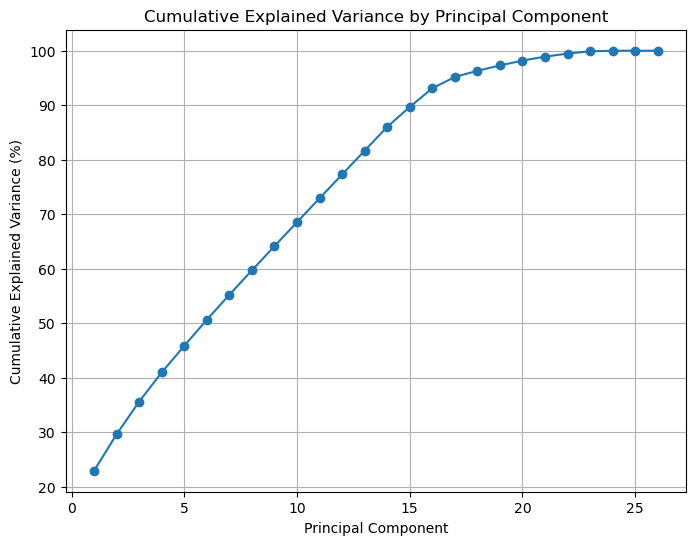

In [5]:
results_vowel_means = pca_cluster(vowel_x, vowel_y, method='G-Means', max_clusters_gkmeans=12, optics_metric='minkowski', optics_algorithm='ball_tree')

In [12]:
results_vowel_means.to_csv('./output/PCA_vowel_means.csv')
results_vowel_means


,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.229406,3.412402e+01,G-Means,0.006378,0.149495,0.226448,0.420636,0.627040,15768.452967,25.106509,NaN
1,2,0.296372,3.260762e+01,G-Means,0.026542,0.194949,0.226311,0.820281,0.337504,2041.182635,43.881394,NaN
2,3,0.356272,3.118880e+01,G-Means,0.019850,0.172727,0.224155,1.092581,0.288098,442.497734,38.072736,NaN
3,4,0.409737,2.986554e+01,G-Means,0.006196,0.158586,0.236726,1.584186,0.305287,260.799443,34.877027,NaN
4,5,0.458559,2.860374e+01,G-Means,0.018332,0.163636,0.182809,1.253620,0.244567,415.219637,44.980556,NaN
5,6,0.506322,2.731300e+01,G-Means,0.005593,0.147475,0.194804,1.253147,0.230734,209.164528,43.351635,NaN
6,7,0.552226,2.601218e+01,G-Means,0.023981,0.163636,0.185891,1.482514,0.233048,238.629556,32.821677,NaN
7,8,0.597028,2.467656e+01,G-Means,0.000862,0.126263,0.170108,1.296376,0.218342,200.706107,24.321779,NaN
8,9,0.641356,2.327978e+01,G-Means,-0.003258,0.113131,0.143985,1.206871,0.337506,243.135079,23.347018,NaN
9,10,0.685369,2.180462e+01,G-Means,0.001044,0.126263,0.159411,1.336194,0.281523,194.000450,20.364860,NaN


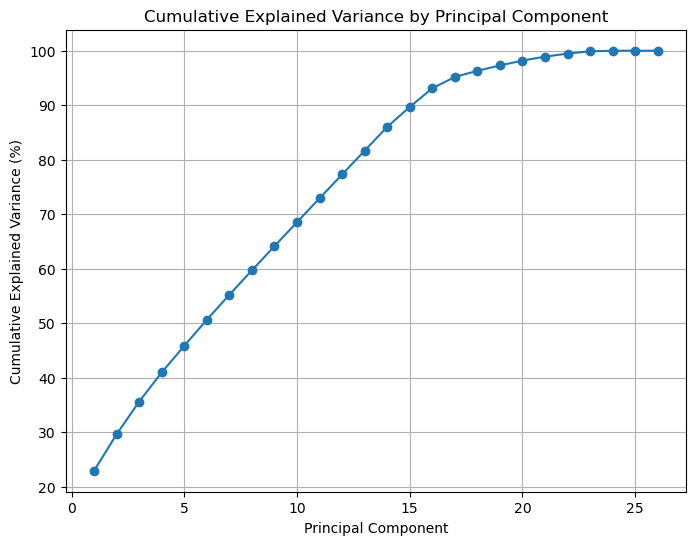

In [13]:
results_vowel_optics = pca_cluster(vowel_x, vowel_y, method='Optics', max_clusters_gkmeans=12, optics_metric='minkowski', optics_algorithm='ball_tree')

In [14]:
results_vowel_optics.to_csv('./output/PCA_vowel_optics.csv')
results_vowel_optics

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.229406,3.412402e+01,Optics,0.004290,0.194949,0.276740,1.006805,-0.091427,48.024830,0.236498,NaN
1,2,0.296372,3.260762e+01,Optics,0.004911,0.164646,0.266953,1.048141,-0.384892,42.378329,0.213505,NaN
2,3,0.356272,3.118880e+01,Optics,0.012555,0.179798,0.282104,1.137274,-0.277270,36.869909,0.216053,NaN
3,4,0.409737,2.986554e+01,Optics,0.018272,0.179798,0.282478,1.177287,-0.220503,38.132787,0.223835,NaN
4,5,0.458559,2.860374e+01,Optics,0.047351,0.200000,0.287179,1.233138,-0.061699,44.946883,0.219653,NaN
5,6,0.506322,2.731300e+01,Optics,0.031674,0.174747,0.242292,1.180687,0.098656,78.545398,0.236759,NaN
6,7,0.552226,2.601218e+01,Optics,0.031885,0.174747,0.240749,1.143256,0.115582,80.018682,0.219258,NaN
7,8,0.597028,2.467656e+01,Optics,0.028294,0.162626,0.214308,1.213496,0.181407,94.029920,0.203979,NaN
8,9,0.641356,2.327978e+01,Optics,0.039282,0.174747,0.239961,1.209751,0.125203,76.532560,0.219608,NaN
9,10,0.685369,2.180462e+01,Optics,0.044144,0.186869,0.245698,1.195229,0.139904,78.255716,0.266584,NaN


In [17]:
dataset = "sick"
x, y = get_dataset(dataset)
sick_x = x.copy()
sick_y = y.copy()


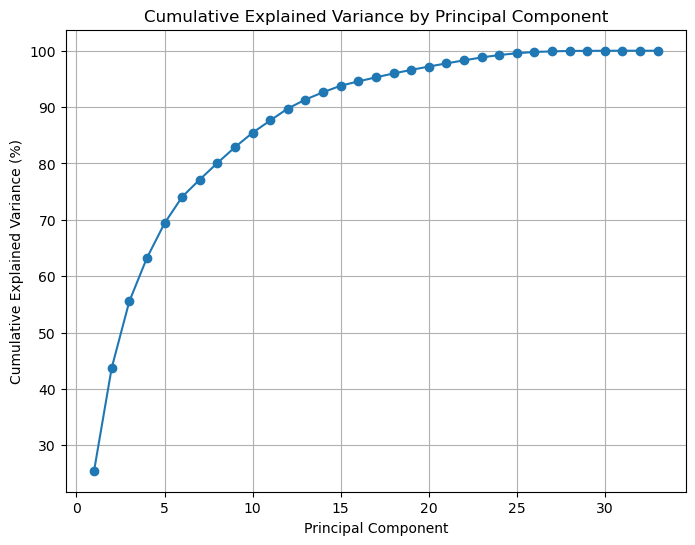

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [18]:
results_sick_means = pca_cluster(sick_x, sick_y, method='G-Means', max_clusters_gkmeans=12, optics_metric='manhattan', optics_algorithm='kd_tree')

In [19]:
results_sick_means.to_csv('./output/PCA_sick_means.csv')
results_sick_means

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.254858,7.577948e+01,G-Means,-0.001064,0.961008,0.335083,0.356669,0.731351,98988.220181,111.647592,NaN
1,2,0.437292,6.585272e+01,G-Means,0.001536,0.961008,0.401941,0.402472,0.797582,32990.889971,96.539018,NaN
2,3,0.555280,5.854306e+01,G-Means,0.000615,0.961008,0.396947,0.517045,0.752829,9316.031648,67.891327,NaN
3,4,0.632422,5.322388e+01,G-Means,0.001143,0.961008,0.396947,0.531431,0.704200,6383.921686,67.296600,NaN
4,5,0.693854,4.857316e+01,G-Means,0.000981,0.961008,0.407561,0.555643,0.718023,4523.236528,66.704089,NaN
5,6,0.740736,4.469956e+01,G-Means,-0.001243,0.961008,0.347284,0.618165,0.712989,3132.678431,65.934517,NaN
6,7,0.771486,4.196510e+01,G-Means,-0.001062,0.961008,0.347284,0.703207,0.616586,2183.840259,67.583879,NaN
7,8,0.800763,3.918471e+01,G-Means,-0.001547,0.961008,0.310103,0.772246,0.586766,1765.268156,68.297726,NaN
8,9,0.828918,3.631068e+01,G-Means,-0.001634,0.961008,0.310103,0.826400,0.581354,1527.724544,66.027341,NaN
9,10,0.854483,3.348796e+01,G-Means,-0.001635,0.961008,0.310103,0.824229,0.551514,1332.329441,64.569923,NaN


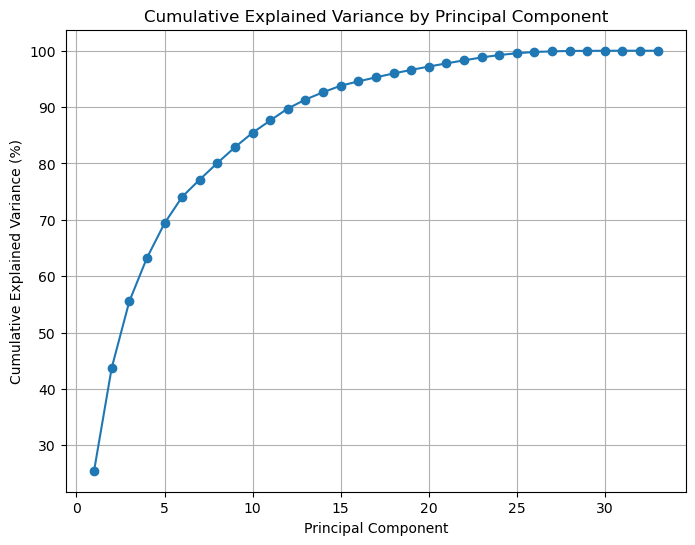

In [19]:
results_sick_optics = pca_cluster(sick_x, sick_y, method='Optics', max_clusters_gkmeans=12,  optics_metric='manhattan', optics_algorithm='kd_tree')

In [20]:
results_sick_optics.to_csv('./output/PCA_sick_optics.csv')
results_sick_optics

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.254858,7.577948e+01,Optics,-0.001706,0.961008,0.670045,5.890858,-0.141908,45.188937,1.684437,NaN
1,2,0.437292,6.585272e+01,Optics,-0.005405,0.961008,0.740767,1.033099,-0.281752,77.644899,1.321466,NaN
2,3,0.555280,5.854306e+01,Optics,-0.017051,0.961008,0.775578,1.083997,-0.343541,65.870019,1.279184,NaN
3,4,0.632422,5.322388e+01,Optics,-0.006077,0.961008,0.638428,1.024575,-0.087549,106.451816,1.714864,NaN
4,5,0.693854,4.857316e+01,Optics,0.003715,0.961008,0.699498,1.072138,-0.180097,75.384031,1.676823,NaN
5,6,0.740736,4.469956e+01,Optics,-0.001661,0.961008,0.740767,1.069205,-0.257088,62.255238,1.478210,NaN
6,7,0.771486,4.196510e+01,Optics,-0.000815,0.961008,0.639374,1.037606,-0.051352,99.300478,1.697840,NaN
7,8,0.800763,3.918471e+01,Optics,-0.002252,0.961008,0.757946,1.015075,-0.278201,61.723542,1.763030,NaN
8,9,0.828918,3.631068e+01,Optics,0.001043,0.961008,0.628413,1.048691,0.024653,102.941160,1.826686,NaN
9,10,0.854483,3.348796e+01,Optics,-0.001270,0.961008,0.592603,0.974034,0.094345,130.930782,2.001503,NaN


KERNEL PCA

In [43]:
import numpy as np
import pandas as pd
import time
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

def kernel_cluster(data, Y, method='G-Means', max_clusters_gkmeans=12, optics_metric='euclidean', optics_algorithm='auto'):
    results = []

    # Initialize KernelPCA
    kpca = KernelPCA(kernel='linear', n_components=None, fit_inverse_transform=True)
    reduced_data = kpca.fit_transform(data)

    # Calculate explained variance
    eigenvalues = kpca.lambdas_
    total_variance = np.sum(eigenvalues)
    explained_variance_ratios = eigenvalues / total_variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratios)

    # Plot cumulative explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(
        np.arange(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance * 100,  # Percentage
        marker='o', linestyle='-'
    )
    plt.title('Cumulative Explained Variance by Principal Component')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.grid(True)
    plt.show()

    for component in range(1, len(cumulative_explained_variance) + 1):
        # Reduce data to the current number of components
        kpca = KernelPCA(kernel='linear', n_components=component)
        reduced_data = kpca.fit_transform(data)

        if method == 'G-Means':
            start_time = time.time()
            clusters_gkmeans, labels_gkmeans = run_global_kmeans(
                reduced_data, max_clusters=max_clusters_gkmeans, distance='euclidean'
            )
            end_time = time.time()
            g_time = end_time - start_time

            # reconstruction_error
            reconstruction_error = np.nan

            results_means = get_metrics_general(reduced_data, Y, labels_gkmeans, method, g_time, n_iterations=None)
            results_means['n_components'] = component
            results_means['explained_variance'] = cumulative_explained_variance[component - 1]
            results_means['reconstruction_error'] = reconstruction_error
            results.append(results_means)
            print(component)

        elif method == 'Optics':
            start_time = time.time()
            optics_labels = apply_optics(reduced_data, metric=optics_metric, algorithm=optics_algorithm)
            end_time = time.time()
            o_time = end_time - start_time

            # reconstruction_error
            reconstruction_error = np.nan

            results_optics = get_metrics_general(reduced_data, Y, optics_labels, method, o_time, n_iterations=None)
            results_optics['n_components'] = component
            results_optics['explained_variance'] = cumulative_explained_variance[component - 1]
            results_optics['reconstruction_error'] = reconstruction_error
            results.append(results_optics)

    # Create a DataFrame with results
    results_df = pd.DataFrame(results)
    columns = ['n_components', 'explained_variance', 'reconstruction_error'] + [col for col in results_df.columns if col not in ['n_components', 'explained_variance', 'reconstruction_error']]
    results_df = results_df[columns]

    return results_df


In [29]:
dataset = "vowel"
x, y = get_dataset(dataset)
vowel_x = x.copy()
vowel_y = y.copy()

C:\Users\maja9\anaconda3\envs\Dimensionality-Reduction-and-Visualization\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


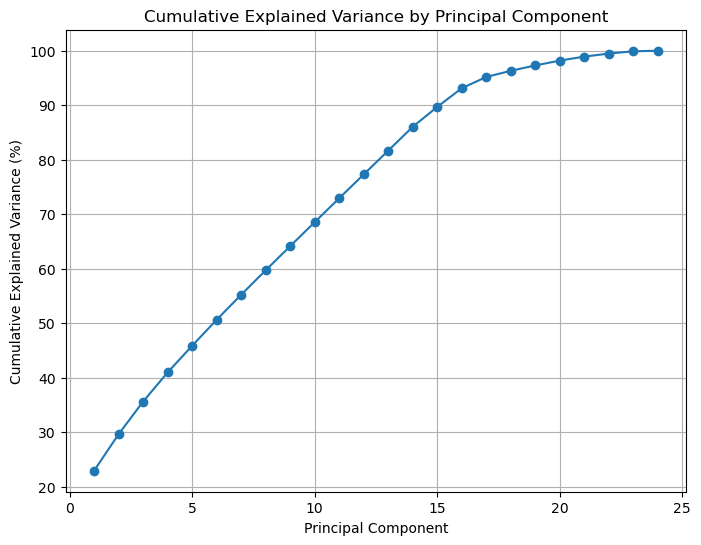

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.229406,NaN,G-Means,0.037819,0.220202,0.223191,0.519308,0.544592,148477.930907,7.402774,NaN
1,2,0.296372,NaN,G-Means,0.038007,0.214141,0.211586,0.708760,0.445101,5992.287854,6.278355,NaN
2,3,0.356272,NaN,G-Means,0.037283,0.195960,0.203720,0.801508,0.394973,1374.897709,6.399964,NaN
3,4,0.409737,NaN,G-Means,0.036658,0.175758,0.209604,0.908920,0.380988,796.998223,6.008694,NaN
4,5,0.458559,NaN,G-Means,0.028916,0.165657,0.176512,0.973197,0.384530,635.587551,6.447912,NaN
5,6,0.506322,NaN,G-Means,0.002007,0.126263,0.144424,0.895760,0.432790,544.965350,6.010681,NaN
6,7,0.552226,NaN,G-Means,-0.008268,0.103030,0.116239,0.861079,0.450326,496.095404,5.723241,NaN
7,8,0.597028,NaN,G-Means,-0.008597,0.096970,0.112281,0.824833,0.485652,517.801739,6.085262,NaN
8,9,0.641356,NaN,G-Means,-0.010065,0.090909,0.108108,0.729323,0.550033,534.009856,6.003776,NaN
9,10,0.685369,NaN,G-Means,-0.009546,0.090909,0.125000,0.779923,0.541405,455.077824,6.379526,NaN


In [30]:
results_vowel_means = kernel_cluster(vowel_x, vowel_y, method='G-Means', max_clusters_gkmeans=12, optics_metric='minkowski', optics_algorithm='ball_tree')
results_vowel_means.to_csv('./output/KERNEL_vowel_means.csv')
results_vowel_means

C:\Users\maja9\anaconda3\envs\Dimensionality-Reduction-and-Visualization\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


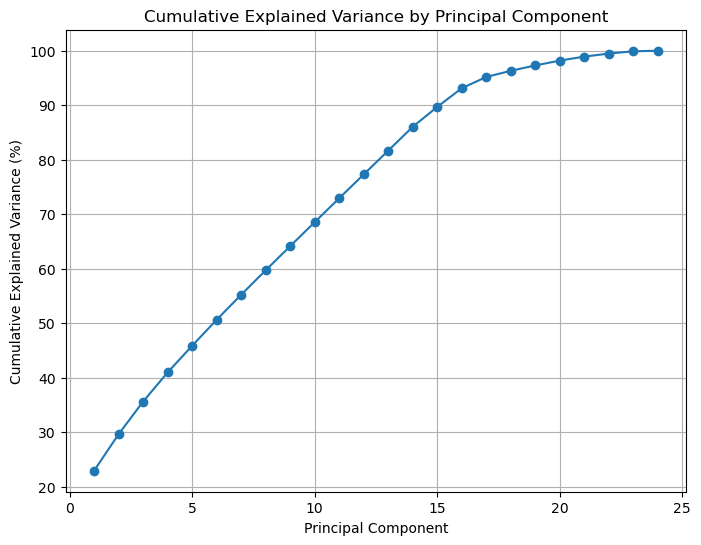

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.229406,NaN,Optics,0.004290,0.194949,0.276740,1.006805,-0.091427,48.024830,0.447779,NaN
1,2,0.296372,NaN,Optics,0.004911,0.164646,0.266953,1.048141,-0.384892,42.378329,0.434764,NaN
2,3,0.356272,NaN,Optics,0.012555,0.179798,0.282104,1.137274,-0.277270,36.869909,0.377057,NaN
3,4,0.409737,NaN,Optics,0.018272,0.179798,0.282478,1.177287,-0.220503,38.132787,0.314245,NaN
4,5,0.458559,NaN,Optics,0.047351,0.200000,0.287179,1.233138,-0.061699,44.946883,0.299088,NaN
5,6,0.506322,NaN,Optics,0.031674,0.174747,0.242292,1.180687,0.098656,78.545398,0.331317,NaN
6,7,0.552226,NaN,Optics,0.031885,0.174747,0.240749,1.143256,0.115582,80.018682,0.317418,NaN
7,8,0.597028,NaN,Optics,0.028294,0.162626,0.214308,1.213496,0.181407,94.029920,0.342662,NaN
8,9,0.641356,NaN,Optics,0.039282,0.174747,0.239961,1.209751,0.125203,76.532560,0.303564,NaN
9,10,0.685369,NaN,Optics,0.044144,0.186869,0.245698,1.195229,0.139904,78.255716,0.377338,NaN


In [41]:
results_vowel_optics = kernel_cluster(vowel_x, vowel_y, method='Optics', max_clusters_gkmeans=12, optics_metric='minkowski', optics_algorithm='ball_tree')
results_vowel_optics.to_csv('./output/KERNEL_vowel_optics.csv')
results_vowel_optics

In [44]:
dataset = "sick"
x, y = get_dataset(dataset)
sick_x = x.copy()
sick_y = y.copy()

C:\Users\maja9\anaconda3\envs\Dimensionality-Reduction-and-Visualization\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


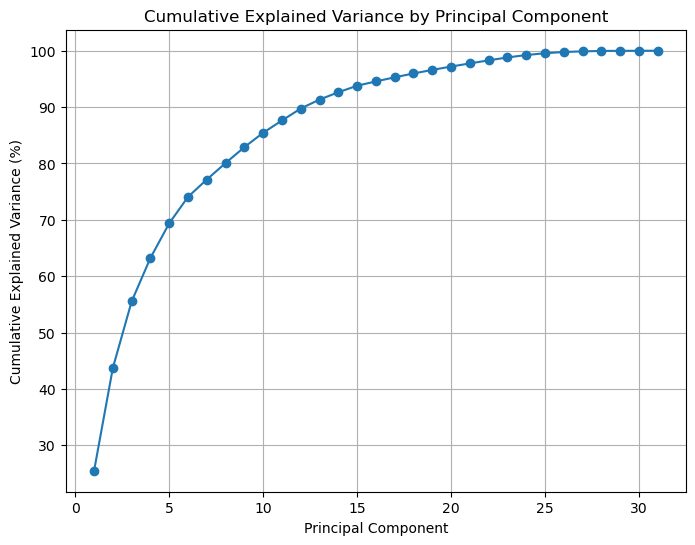

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.254858,NaN,G-Means,-0.001064,0.961008,0.335083,0.356669,0.731351,98988.220181,102.963742,NaN
1,2,0.437292,NaN,G-Means,0.001536,0.961008,0.401941,0.402472,0.797582,32990.889971,68.129887,NaN
2,3,0.555280,NaN,G-Means,0.000615,0.961008,0.396947,0.517045,0.752829,9316.031648,67.586788,NaN
3,4,0.632422,NaN,G-Means,0.001143,0.961008,0.396947,0.531431,0.704200,6383.921686,66.849493,NaN
4,5,0.693854,NaN,G-Means,0.000981,0.961008,0.407561,0.555643,0.718023,4523.236528,66.575130,NaN
5,6,0.740736,NaN,G-Means,-0.001243,0.961008,0.347284,0.618165,0.712989,3132.678431,67.527666,NaN
6,7,0.771486,NaN,G-Means,-0.001062,0.961008,0.347284,0.703207,0.616586,2183.840259,65.550714,NaN
7,8,0.800763,NaN,G-Means,-0.001547,0.961008,0.310103,0.772246,0.586766,1765.268156,65.962811,NaN
8,9,0.828918,NaN,G-Means,-0.001634,0.961008,0.310103,0.826400,0.581354,1527.724544,65.374921,NaN
9,10,0.854483,NaN,G-Means,-0.001635,0.961008,0.310103,0.824229,0.551514,1332.329441,65.399610,NaN


In [47]:
results_sick_means = kernel_cluster(sick_x, sick_y, method='G-Means', max_clusters_gkmeans=12,  optics_metric='manhattan', optics_algorithm='kd_tree')
results_sick_means.to_csv('./output/KERNEL_sick_means.csv')
results_sick_means

C:\Users\maja9\anaconda3\envs\Dimensionality-Reduction-and-Visualization\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


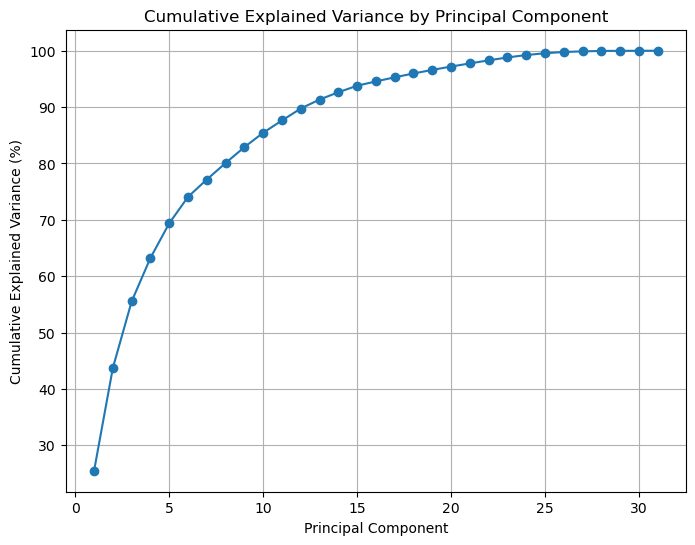

,n_components,explained_variance,reconstruction_error,Method,ARI,Purity,F-Measure,Davies-Bouldin Index,Silhouette Coefficient,Calinski,Solving Time,Iterations
0,1,0.254858,NaN,Optics,-0.001706,0.961008,0.670045,5.890858,-0.141908,45.188937,1.427479,NaN
1,2,0.437292,NaN,Optics,-0.005405,0.961008,0.740767,1.033099,-0.281752,77.644899,1.256273,NaN
2,3,0.555280,NaN,Optics,-0.015471,0.961008,0.771411,1.075287,-0.333294,72.738136,1.539900,NaN
3,4,0.632422,NaN,Optics,-0.006077,0.961008,0.638428,1.024575,-0.087549,106.451816,1.634873,NaN
4,5,0.693854,NaN,Optics,0.003715,0.961008,0.699498,1.072138,-0.180097,75.384031,1.543445,NaN
5,6,0.740736,NaN,Optics,-0.000602,0.961008,0.736140,1.059482,-0.246641,67.279447,1.588035,NaN
6,7,0.771486,NaN,Optics,-0.000815,0.961008,0.639374,1.037596,-0.051245,99.304550,1.684753,NaN
7,8,0.800763,NaN,Optics,-0.002213,0.961008,0.758141,1.015441,-0.278695,61.536467,1.649857,NaN
8,9,0.828918,NaN,Optics,0.001018,0.961008,0.628173,1.048215,0.025007,103.229092,1.667296,NaN
9,10,0.854483,NaN,Optics,-0.001270,0.961008,0.592603,0.974034,0.094345,130.930782,2.169531,NaN


In [25]:
results_sick_optics = kernel_cluster(sick_x, sick_y, method='Optics', max_clusters_gkmeans=12,  optics_metric='manhattan', optics_algorithm='kd_tree')
results_sick_optics.to_csv('./output/KERNEL_sick_optics.csv')
results_sick_optics